### Initialize connection and retrieve list of tables

In [2]:
import sqlite3
import pandas as pd
#Data loading and visualization 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
# Accessing local db
dbfile = 'databases/Global_Coral_Bleaching_Database_SQLite_11_24_21.db'

# Getting connection and cursor
con = sqlite3.connect(dbfile)
cur = con.cursor()

Guide with inspiration from [medium](https://medium.com/analytics-vidhya/a-guide-to-building-your-first-data-science-project-e5f814b098a7)

#### Problem statement

In this notbook we will look at data sampled from reefs all over the world. The corals are monitored for bleaching events based on a lot of different variables. We will look into relationships between bleaching, hard corals and pecent macro algea
The data is described here: https://www.nature.com/articles/s41597-022-01121-y.pdf

#### What are some questions I can answer with this data?
##### Questions I could try to answer:
1. Coral bleaching classification
1. ..

#### What are Techniques that may help me answer these questions?

##### Stastisticals models
1. Univariate ts modeling
1. ++
##### Machine learning models
1. +++

### List the names of all the tables (also see table_info.txt for column names in every table)

In [3]:
table_list = [a for a in cur.execute("SELECT name FROM sqlite_master WHERE type = 'table'")]
print(type(table_list[0][0]))
print(*table_list, sep='\n')

<class 'str'>
('Authors_LUT',)
('Bleaching_Level_LUT',)
('Bleaching_Prevalence_Score_LUT',)
('Bleaching_tbl',)
('City_Town_Name_LUT',)
('Country_Name_LUT',)
('Cover_tbl',)
('Data_Source_LUT',)
('Ecoregion_Name_LUT',)
('Environmental_tbl',)
('Exposure_LUT',)
('Ocean_Name_LUT',)
('R_Scripts_tbl',)
('Realm_Name_LUT',)
('Sample_Event_tbl',)
('Severity_Code_LUT',)
('Site_Info_tbl',)
('State_Island_Province_Name_LUT',)
('Substrate_Type_LUT',)
('Query_2_Sample_Event_Counts',)
('Query_3_Time_Series',)
('Query_4_Samples_by_Data_Source',)
('Query_5_Sites_by_Data_Source',)
('Query_6_Sites_with_Multiple_Sample_Events',)
('Subquery_1_Sites_and_Sample_Events',)
('Subquery_6_Calculated_Reef_Check_Segments',)


### For printing specific table content

In [4]:
TABLE_NAME='Bleaching_tbl'
table = pd.read_sql_query("SELECT * from {}".format(TABLE_NAME), con)
print(table.head())

   Bleaching_ID  Sample_ID  Bleaching_Level  S1  S2  S3  S4  \
0          9623       9623              NaN NaN NaN NaN NaN   
1          9624       9624              NaN NaN NaN NaN NaN   
2          9625       9625              NaN NaN NaN NaN NaN   
3          9626       9626              NaN NaN NaN NaN NaN   
4          9627       9627              NaN NaN NaN NaN NaN   

  Percent_Bleaching_Old_Method  Severity_Code  Percent_Bleached  \
0                         None            3.0               NaN   
1                         None            3.0               NaN   
2                         None            0.0               NaN   
3                         None            2.0               NaN   
4                         None            3.0               NaN   

  Number__Bleached_Colonies  bleach_intensity  Bleaching_Prevalence_Score  \
0                      None               NaN                         NaN   
1                      None               NaN                   

Lets look at the bleaching data to determine our output label.
There are a lot of variables used for measuring coral bleaching but we will go for percent bleached as this gives us a good overview.
Should we also include serverity code? and is this simplicfication ok?

In [5]:

TABLE_NAME='Bleaching_tbl'
bleach_table = pd.read_sql_query("SELECT * from {}".format(TABLE_NAME), con)
# Gives us indication of the data we are looking at, check if we have enough data to work with
print(bleach_table[bleach_table["Percent_Bleached"].notnull()].count())

Bleaching_ID                    8961
Sample_ID                       8961
Bleaching_Level                    0
S1                                 0
S2                                 0
S3                                 0
S4                                 0
Percent_Bleaching_Old_Method       0
Severity_Code                   3489
Percent_Bleached                8961
Number__Bleached_Colonies        226
bleach_intensity                 226
Bleaching_Prevalence_Score         0
TRIAL485                        8961
dtype: int64


In [6]:
TABLE_NAME='Bleaching_tbl'
bleach_table = pd.read_sql_query("SELECT * from {}".format(TABLE_NAME), con)
# Gives us indication of the data we are looking at, check if we have enough data to work with
#print(bleach_table[bleach_table["Percent_Bleached"].notnull()].count())
print(bleach_table[bleach_table["Percent_Bleached"] > 10].count())

Bleaching_ID                    4100
Sample_ID                       4100
Bleaching_Level                    0
S1                                 0
S2                                 0
S3                                 0
S4                                 0
Percent_Bleaching_Old_Method       0
Severity_Code                   2381
Percent_Bleached                4100
Number__Bleached_Colonies        207
bleach_intensity                 207
Bleaching_Prevalence_Score         0
TRIAL485                        4100
dtype: int64


In [38]:
TABLE_NAME='Cover_tbl'
cover_tbl = pd.read_sql_query("SELECT * from {}".format(TABLE_NAME), con)
# Gives us indication of the data we are looking at, check if we have enough data to work with
#print(bleach_table[bleach_table["Percent_Bleached"].notnull()].count())
print(cover_tbl.columns)
samples_w_data = cover_tbl[cover_tbl["Percent_Macroalgae"].notnull()]
cover_samples = samples_w_data.groupby("Sample_ID")
print(len(samples_w_data))
print(cover_samples.describe())

Index(['Cover_ID', 'Sample_ID', 'Percent_Hard_Coral', 'Percent_Macroalgae',
       'Substrate_Type', 'S1', 'S2', 'S3', 'S4', 'Comments', 'TRIAL495'],
      dtype='object')
197
          Cover_ID                                                            \
             count     mean std      min      25%      50%      75%      max   
Sample_ID                                                                      
10290432       1.0  22704.0 NaN  22704.0  22704.0  22704.0  22704.0  22704.0   
10290433       1.0  22705.0 NaN  22705.0  22705.0  22705.0  22705.0  22705.0   
10290434       1.0  22706.0 NaN  22706.0  22706.0  22706.0  22706.0  22706.0   
10290435       1.0  22707.0 NaN  22707.0  22707.0  22707.0  22707.0  22707.0   
10290436       1.0  22708.0 NaN  22708.0  22708.0  22708.0  22708.0  22708.0   
...            ...      ...  ..      ...      ...      ...      ...      ...   
10290653       1.0  22699.0 NaN  22699.0  22699.0  22699.0  22699.0  22699.0   
10290654       1.0  2270

In [94]:
site_info = "Site_Info_tbl"
sample_info="Sample_Event_tbl"
eco_info = 'Ecoregion_Name_LUT'
# Retrieve base dataframes
site_df = pd.read_sql_query("SELECT * from {}".format(site_info), con)
site_df=site_df.rename(columns={"Ecoregion_Name":"Ecoregion_ID"})

sample_df = pd.read_sql_query("SELECT * from {}".format(sample_info), con)

eco_lut = pd.read_sql_query("SELECT * from {}".format(eco_info), con)


# Link site info with ecoregion name
eco_site_join = pd.merge(site_df, eco_lut, how="inner", on="Ecoregion_ID")

# Link ecoregion name with samples
eco_site_sample_join = pd.merge(eco_site_join, sample_df, how="inner", on="Site_ID")

cover_tbl_name='Cover_tbl'
cover_tbl_df = pd.read_sql_query("SELECT * from {}".format(cover_tbl_name), con)
smaple_cover_join = pd.merge(eco_site_sample_join, cover_tbl_df, how='inner', on='Sample_ID')

samples_w_data = smaple_cover_join[smaple_cover_join["Percent_Macroalgae"].notnull()]
cover_samples = samples_w_data.groupby("Ecoregion_Name")
print(cover_samples.count().sort_values(by="Sample_ID", ascending=False))


                                   Site_ID  Data_Source  Latitude_Degrees  \
Ecoregion_Name                                                              
Kenya and Tanzania coast                51           51                51   
Lakshadweep Islands                     22           22                22   
North Madagascar                        21           21                21   
Java Sea                                18           18                18   
Solomon Islands and Bougainville        16           16                16   
Strait of Malacca                       14           14                14   
South Madagascar                        12           12                12   
Fiji                                    11           11                11   
Mascarene Islands                       11           11                11   
Lesser Sunda Islands and Savu Sea        9            9                 9   
Andaman Islands                          8            8                 8   

Index(['Site_ID', 'Data_Source', 'Latitude_Degrees', 'Longitude_Degrees',
       'Ocean_Name', 'Realm_Name', 'Ecoregion_ID', 'Country_Name',
       'State_Island_Province_Name', 'City_Town_Name', 'City_Town_Name_2',
       'City_Town_Name_3', 'City_Town_Name_4', 'Site_Name',
       'Distance_to_Shore', 'Exposure', 'Turbidity', 'Cyclone_Frequency',
       'Comments_x', 'TRIAL534', 'Ecoregion_Name', 'TRIAL501', 'Sample_ID',
       'Reef_ID', 'Date_Day', 'Date_Month', 'Date_Year', 'Depth_m',
       'Quadrat_No', 'Comments_y', 'TRIAL528', 'Cover_ID',
       'Percent_Hard_Coral', 'Percent_Macroalgae', 'Substrate_Type', 'S1',
       'S2', 'S3', 'S4', 'Comments', 'TRIAL495'],
      dtype='object')


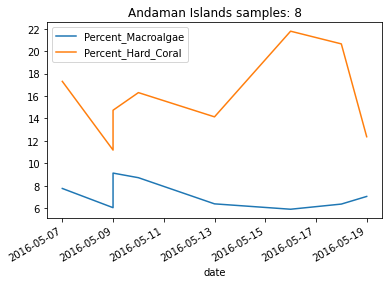

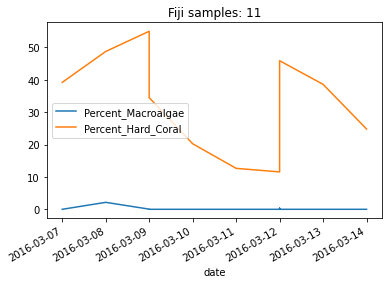

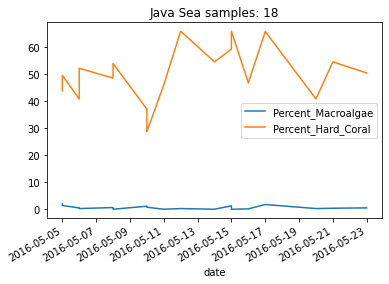

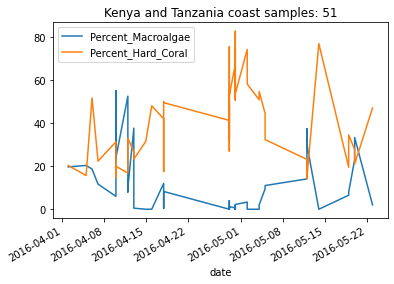

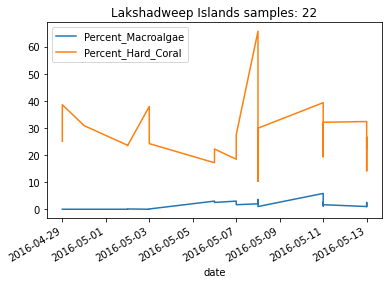

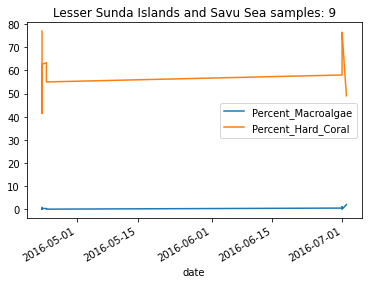

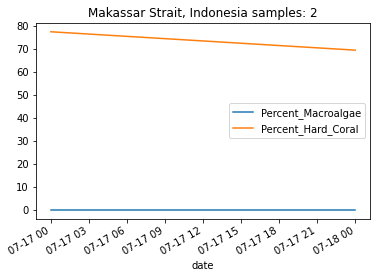

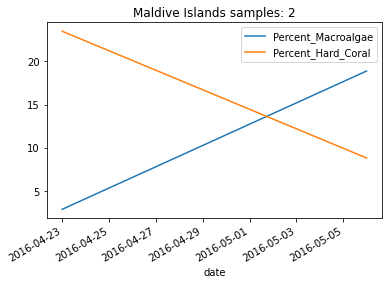

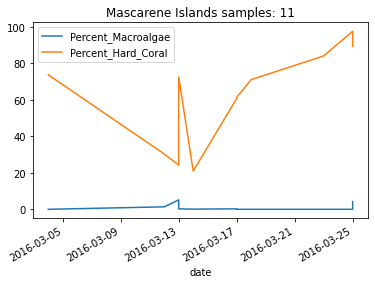

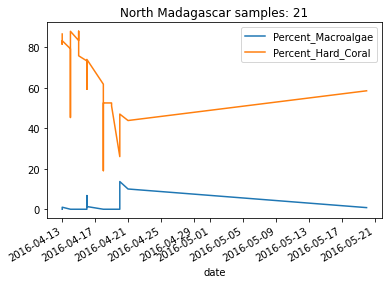

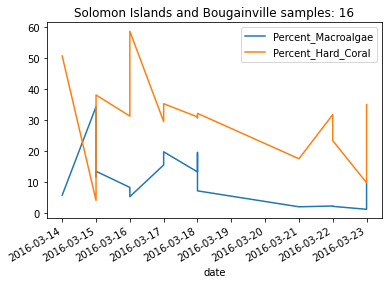

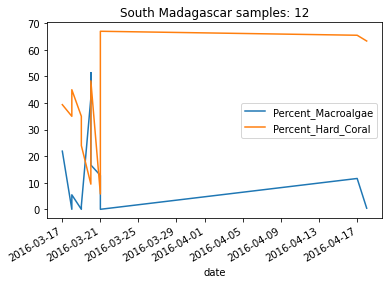

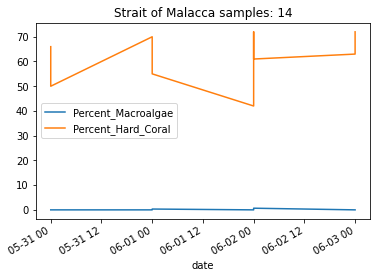

In [103]:
print(cover_samples.get_group("Kenya and Tanzania coast").columns)
for m, g in cover_samples:
    selected_data = cover_samples.get_group(m)[["Percent_Macroalgae", "Percent_Hard_Coral","Date_Month","Date_Day","Date_Year", "Sample_ID"]]
    selected_data = selected_data.rename(columns={"Date_Year": "year","Date_Month": "month","Date_Day": "day"})
    selected_data["date"] = pd.to_datetime(selected_data[["year","month","day"]])
    plot = selected_data.plot(x = "date", y = "Percent_Macroalgae", kind = "line", title=f"{m} samples: {len(g)}")
    selected_data.plot(x = "date", y = "Percent_Hard_Coral", ax=plot, kind = "line")
    plt.show()

In [113]:
site_info = "Site_Info_tbl"
sample_info="Sample_Event_tbl"
eco_info = 'Ecoregion_Name_LUT'
bleach = "Bleaching_tbl"
envir = "Environmental_tbl"
# Retrieve base dataframes
site_df = pd.read_sql_query("SELECT * from {}".format(site_info), con)
site_df=site_df.rename(columns={"Ecoregion_Name":"Ecoregion_ID"})

sample_df = pd.read_sql_query("SELECT * from {}".format(sample_info), con)

eco_lut = pd.read_sql_query("SELECT * from {}".format(eco_info), con)
bleach_df = pd.read_sql_query("SELECT * from {}".format(bleach), con)
envir_df = pd.read_sql_query("SELECT * from {}".format(envir), con)
# Link site info with ecoregion name
eco_site_join = pd.merge(site_df, eco_lut, how="inner", on="Ecoregion_ID")

# Link ecoregion name with samples
eco_site_sample_join = pd.merge(eco_site_join, sample_df, how="inner", on="Site_ID")

bleach_site_join = pd.merge(eco_site_sample_join, bleach_df, how='inner', on='Sample_ID')
bleach_site_env_join = pd.merge(bleach_site_join, envir_df, how='inner', on='Sample_ID')




# samples_w_data = smaple_cover_join[smaple_cover_join["Percent_Macroalgae"].notnull()]
# cover_samples = samples_w_data.groupby("Ecoregion_Name")
# print(cover_samples.count().sort_values(by="Sample_ID", ascending=False))

4061
622
Index(['Site_ID', 'Data_Source', 'Latitude_Degrees', 'Longitude_Degrees',
       'Ocean_Name', 'Realm_Name', 'Ecoregion_ID', 'Country_Name',
       'State_Island_Province_Name', 'City_Town_Name', 'City_Town_Name_2',
       'City_Town_Name_3', 'City_Town_Name_4', 'Site_Name',
       'Distance_to_Shore', 'Exposure', 'Turbidity', 'Cyclone_Frequency',
       'Comments_x', 'TRIAL534', 'Ecoregion_Name', 'TRIAL501_x', 'Sample_ID',
       'Reef_ID', 'day', 'month', 'year', 'Depth_m', 'Quadrat_No',
       'Comments_y', 'TRIAL528', 'Bleaching_ID', 'Bleaching_Level', 'S1', 'S2',
       'S3', 'S4', 'Percent_Bleaching_Old_Method', 'Severity_Code',
       'Percent_Bleached', 'Number__Bleached_Colonies', 'bleach_intensity',
       'Bleaching_Prevalence_Score', 'TRIAL485', 'Environmental_ID', 'ClimSST',
       'Temperature_Kelvin', 'Temperature_Mean', 'Temperature_Minimum',
       'Temperature_Maximum', 'Temperature_Kelvin_Standard_Deviation',
       'Windspeed', 'SSTA', 'SSTA_Standard_Deviat

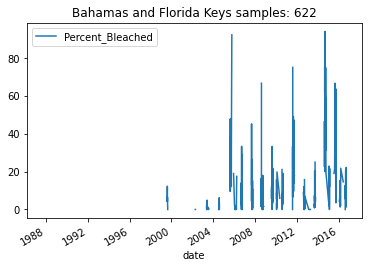

In [133]:
bleach_site_env_join_g = bleach_site_env_join.groupby("Ecoregion_Name")
#print(bleach_site_env_join_g.count().sort_values(by="Sample_ID", ascending=False))
region = "Bahamas and Florida Keys"
selected_data = bleach_site_env_join_g.get_group(region)
selected_data.columns
selected_data = selected_data.rename(columns={"Date_Year": "year","Date_Month": "month","Date_Day": "day"})
selected_data["date"] = pd.to_datetime(selected_data[["year","month","day"]])
print(len(selected_data))
print(len(selected_data["date"].unique()))
print(selected_data.columns)
selected_data_dupl_drop = selected_data.drop_duplicates(subset="date")
selected_data_dupl_drop.reset_index()
selected_data_dupl_dropprint
plot = selected_data_dupl_drop.plot(x = "date", y = "Percent_Bleached", kind = "line", title=f"{region} samples: {len(selected_data_dupl_drop)}")
#selected_data.plot(x = "date", y = "Temperature_Mean", ax=plot, kind = "line")
plt.show()


In [11]:
TABLE_NAME='Substrate_Type_LUT'
sub_tbl = pd.read_sql_query("SELECT * from {}".format(TABLE_NAME), con)
# Gives us indication of the data we are looking at, check if we have enough data to work with
#print(bleach_table[bleach_table["Percent_Bleached"].notnull()].count())
print(sub_tbl.head())

   Substrate_ID            Substrate_Name TRIAL541
0             1                Hard Coral        T
1             2            Fleshy Seaweed        T
2             3  Nutrient Indicator Algae        T


In [19]:
cover_tbl="Cover_tbl"
sub_lut = "Substrate_Type_LUT"
sub_df = pd.read_sql_query("SELECT * from {}".format(sub_lut), con)
sub_df=sub_df.rename(columns={"Substrate_ID":"Substrate_Type"})
cover_df = pd.read_sql_query("SELECT * from {}".format(cover_tbl), con)
cover_join = pd.merge(sub_df, cover_df, how='inner', on='Substrate_Type')

print(cover_df[cover_df["Percent_Macroalgae"].notnull()])
print(cover_join[cover_join["Percent_Macroalgae"].notnull()])

     Cover_ID  Sample_ID  Percent_Hard_Coral  Percent_Macroalgae  \
0       22558   10290512                9.47               41.84   
1       22559   10290513               14.76               51.43   
2       22560   10290514               65.50               11.60   
3       22561   10290515               39.38               21.88   
4       22562   10290516               48.33               16.67   
..        ...        ...                 ...                 ...   
196     22775   10290503               14.14                6.39   
197     22776   10290504               11.18                6.05   
198     22777   10290505               14.73                9.13   
199     22778   10290506               16.30                8.72   
200     22779   10290507               17.30                7.76   

     Substrate_Type  S1  S2  S3  S4 Comments TRIAL495  
0               NaN NaN NaN NaN NaN     None        T  
1               NaN NaN NaN NaN NaN     None        T  
2              

Now that we have found our output label we want to limit the area of search to the regions with the most samples in order to give a better prediction

First we count the number of samples per ocean

In [6]:
site_info="Site_Info_tbl"
ocean_id = "Ocean_Name_LUT"

oceans_count_df = pd.read_sql_query("SELECT Ocean_name, COUNT(*) FROM {} GROUP BY Ocean_name".format(site_info), con)
oceans_count_df=oceans_count_df.rename(columns={"Ocean_Name":"Ocean_ID"})

oceans_id_df = pd.read_sql_query("SELECT * from {}".format(ocean_id), con)
ocean_join = pd.merge(oceans_count_df, oceans_id_df, how='inner', on='Ocean_ID')

print(ocean_join[['Ocean_Name', 'COUNT(*)']])

     Ocean_Name  COUNT(*)
0       Pacific      5625
1      Atlantic      7222
2        Indian      1199
3       Red Sea       231
4  Arabian Gulf       128


Then we find the most samples per ecoregion